# Problem Statement

ABC is an online content sharing platform that enables users to create, upload and share the content in the form of videos. It includes videos from different genres like entertainment, education, sports, technology and so on. The maximum duration of video is 10 minutes.

Users can like, comment and share the videos on the platform. 

Based on the user’s interaction with the videos, engagement score is assigned to the video with respect to each user. Engagement score defines how engaging the content of the video is. 

Understanding the engagement score of the video improves the user’s interaction with the platform. It defines the type of content that is appealing to the user and engages the larger audience.

# Variable Description

row_id - Unique identifier of the row

user_id - Unique identifier of the user

category_id - Category of the video

video_id - Unique identifier of the video

age - Age of the user

gender - Gender of the user (Male and Female)

profession - Profession of the user (Student, Working Professional, Other)

followers - No. of users following a particular category

views - Total views of the videos present in the particular category

engagement_score - Engagement score of the video for a user

In [1]:
## importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## importing the train and test dataset to read as csv file

train = pd.read_csv('train_0OECtn8.csv')
test = pd.read_csv('test_1zqHu22.csv')

In [2]:
## checking the rows and columns by using the head function...

train.head(5)

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [3]:
test.head(5)

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [4]:
## checking the dimension of the train dataset...

train.shape

(89197, 10)

So, we have 89197 rows and 10 columns present in dataset

In [5]:
## Here info function gives the number of entries and data types of the dataset

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            89197 non-null  int64  
 1   user_id           89197 non-null  int64  
 2   category_id       89197 non-null  int64  
 3   video_id          89197 non-null  int64  
 4   age               89197 non-null  int64  
 5   gender            89197 non-null  object 
 6   profession        89197 non-null  object 
 7   followers         89197 non-null  int64  
 8   views             89197 non-null  int64  
 9   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.8+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11121 entries, 0 to 11120
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   row_id       11121 non-null  int64 
 1   user_id      11121 non-null  int64 
 2   category_id  11121 non-null  int64 
 3   video_id     11121 non-null  int64 
 4   age          11121 non-null  int64 
 5   gender       11121 non-null  object
 6   profession   11121 non-null  object
 7   followers    11121 non-null  int64 
 8   views        11121 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 782.1+ KB


Here we can see that there are no missing values and null values.....

datatypes are also correct with respect to that column

array([[<AxesSubplot:title={'center':'row_id'}>,
        <AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'category_id'}>],
       [<AxesSubplot:title={'center':'video_id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'followers'}>],
       [<AxesSubplot:title={'center':'views'}>,
        <AxesSubplot:title={'center':'engagement_score'}>,
        <AxesSubplot:>]], dtype=object)

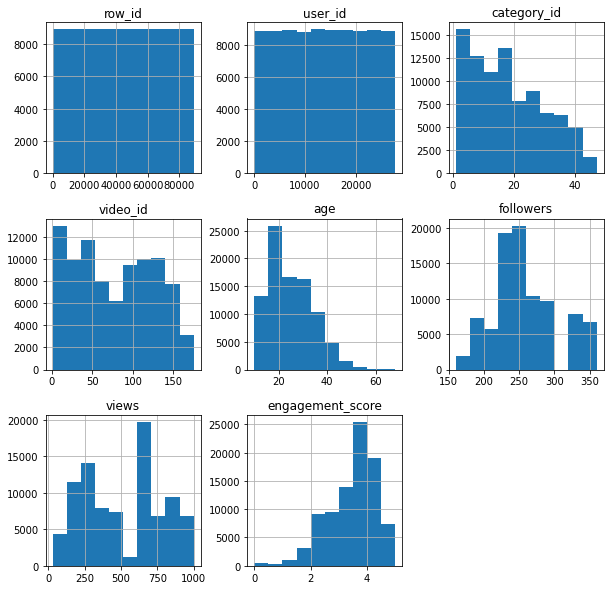

In [7]:
## checking the distribution of the dataset of columns

train.hist(figsize = (10,10))

The distributions of the columns are not normal.

It is important to narmalize our data to get the good accuracy

In [8]:
## checking for the null values by using the isnull() function.

train.isnull().sum()

row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

In [9]:
test.isnull().sum()

row_id         0
user_id        0
category_id    0
video_id       0
age            0
gender         0
profession     0
followers      0
views          0
dtype: int64

We can see that there are no missing values or null values in the dataset.

In [10]:
## Here describe function gives the basic description of the dataset like mean,min,max...
train.describe()

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score
count,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000
mean,44599.000000,13881.909806,18.323733,77.715383,24.848616,252.460172,502.980268,3.487797
std,25749.100318,8005.582771,11.675154,48.469656,8.955535,46.094468,268.569482,0.863498
min,1.000000,1.000000,1.000000,1.000000,10.000000,160.000000,30.000000,0.000000
25%,22300.000000,6945.000000,8.000000,34.000000,18.000000,230.000000,229.000000,2.900000
50%,44599.000000,13892.000000,16.000000,76.000000,23.000000,240.000000,467.000000,3.710000
75%,66898.000000,20819.000000,26.000000,120.000000,32.000000,280.000000,714.000000,4.150000
max,89197.000000,27734.000000,47.000000,175.000000,68.000000,360.000000,1000.000000,5.000000


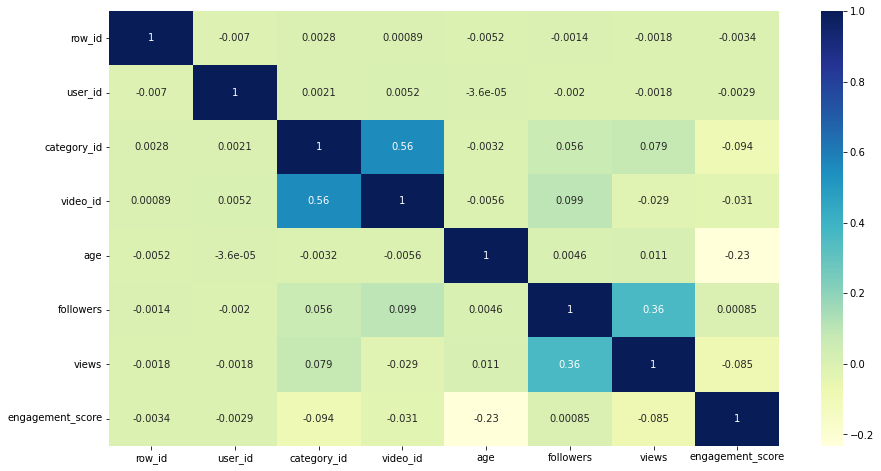

In [11]:
plt.figure(figsize = (15,8))

corr = train.corr()
sns.heatmap(corr, cmap = 'YlGnBu', annot = True)
plt.show()

The variables are all independent from each other

# Exploring the data

<AxesSubplot:xlabel='gender', ylabel='count'>

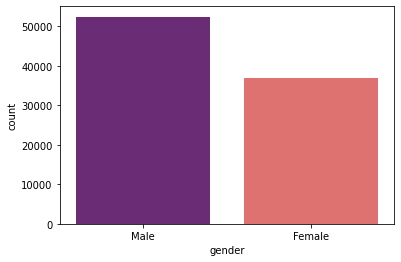

In [12]:
## checking the count of gender column

sns.countplot(train['gender'],palette = 'magma')

We can see that male count is more than the female

<AxesSubplot:xlabel='profession', ylabel='count'>

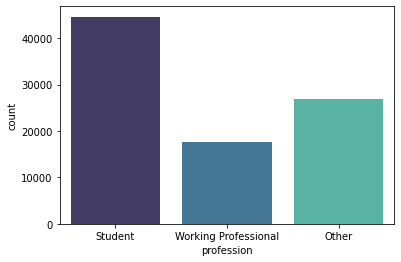

In [13]:
## checking the count of profession column by using the countplot

sns.countplot(train['profession'],palette = 'mako')

Here we can see that students have more count, that means students are more active in this.

others are in the second plcae after students.

working professional is in 3rd place.

In [14]:
## Adding the new feature by using the age column
## breaking the age group accroding to the age

bins = [1,10,14,17,30,60,100]
labels = ['kid','young child','teenager','young adult','adult','senior']

train['age_group'] = train['age_group'] = pd.cut(train['age'],bins = bins,labels = labels)

In [15]:
train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score,age_group
0,1,19990,37,128,24,Male,Student,180,1000,4.33,young adult
1,2,5304,32,132,14,Female,Student,330,714,1.79,young child
2,3,1840,12,24,19,Male,Student,180,138,4.35,young adult
3,4,12597,23,112,19,Male,Student,220,613,3.77,young adult
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13,young adult


Here we can see that there's added a new column called age_group

In [16]:
## counting the age_group column by using the value_counts function

train['age_group'].value_counts()

young adult    42322
adult          25224
teenager       12245
young child     8621
kid              752
senior            33
Name: age_group, dtype: int64

<AxesSubplot:xlabel='age_group', ylabel='count'>

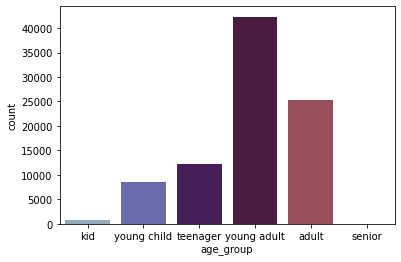

In [17]:
sns.countplot(train['age_group'],palette = 'twilight')

Here we can see that there are more young adults are there that the age between 17 - 30.

Adults are in the second place (age between 30 - 60)

Teenagers are in the third place (age between 14 - 17)

young child, kids and seniors are quite less than the others

<AxesSubplot:xlabel='gender', ylabel='views'>

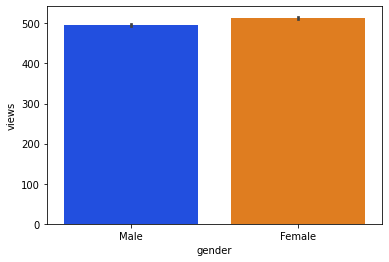

In [18]:
## checking the views column and gender column by using the barplot

sns.barplot(x = train['gender'],y = train['views'],palette = 'bright')

There is no much difference between male and female views...

But female is quite high in views

<AxesSubplot:xlabel='profession', ylabel='views'>

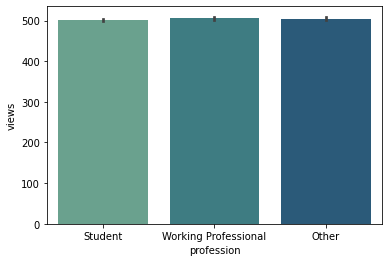

In [19]:
## checking the profession column with views column by using the bar plot

sns.barplot(x = train['profession'],y = train['views'],palette = 'crest')

Here almost students, working profession and others have the same views

# Outlier Treatment

In [20]:
## checking the outliers percentage of every column in the dataset


numeric_cols = train.select_dtypes(['int64','float64']).columns
## taking columns of datatype int and float in numeric_cols

## Keeping the name as outliers_per_dict and using the fot loop in numeric_cols
outliers_per_dict = {}
for i in numeric_cols:
  ##Using the IQR for outliers and giving the maximum range(.75) - minimum range(.25)

    IQR = train[i].quantile(.75)-train[i].quantile(.25)
    ## Taking the d[i] with qunatile range .75 + 1.5(factor) multiply by IQR and d[i] with quantile range .25 - 1.5 multiply by
    ## IQR
    outliers_count = train[(train[i]>(train[i].quantile(.75)+1.5*IQR)) | (train[i]<(train[i].quantile(.25)-1.5*IQR))].shape[0]
    total = train.shape[0]
    outliers_per = round(outliers_count/total*100,2)
    outliers_per_dict[i] = outliers_per
outlier_df = pd.DataFrame({'Features':list(outliers_per_dict.keys()),'Percentage':list(outliers_per_dict.values())})
outlier_df

,Features,Percentage
0,row_id,0.00
1,user_id,0.00
2,category_id,0.00
3,video_id,0.00
4,age,0.24
5,followers,2.03
6,views,0.00
7,engagement_score,0.92


There are no much outliers in the dataset except the columns age, followers andf engagement_score

<AxesSubplot:xlabel='engagement_score'>

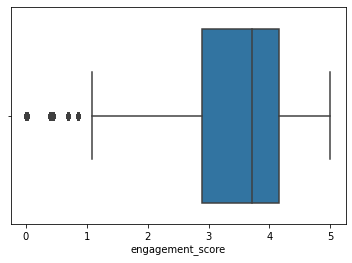

In [21]:
## Using the boxplot to check the outliers

sns.boxplot(train['engagement_score']) ## checking on engagement_score column

<AxesSubplot:xlabel='followers'>

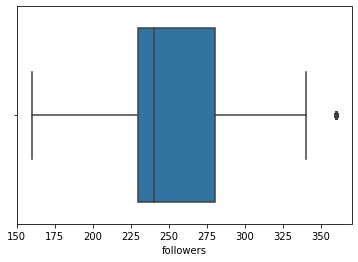

In [22]:
sns.boxplot(train['followers']) ## checking the followers column

<AxesSubplot:xlabel='age'>

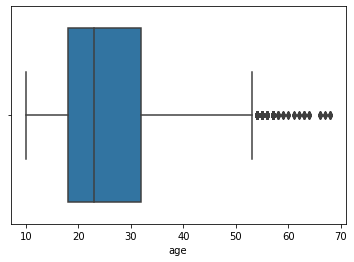

In [23]:
sns.boxplot(train['age']) ## checking on age column

We can see that age and engagement_score columns have outliers....

followers columns doesn't contain much outliers comparing to age and engagement_score columns

In [24]:

## Removing the outliers by using the IQR for age and engagement_score columns

Q1 = train['age'].quantile(0.25)
Q3 = train['age'].quantile(0.75)
IQR = Q3 - Q1

train = train[~((train['age'] < (Q1 - 1.5 * IQR)) |(train['age'] > (Q3 + 1.5 * IQR)))]


In [25]:
Q1 = train['engagement_score'].quantile(0.25)
Q3 = train['engagement_score'].quantile(0.75)
IQR = Q3 - Q1

train = train[~((train['engagement_score'] < (Q1 - 1.5 * IQR)) |(train['engagement_score'] > (Q3 + 1.5 * IQR)))]


we are removing outliers of the age and engagement_score columns from the dataset, as we know outliers may effect the accuracy.

followers column doesn't contain much outliers....there's is only one outlier so it may not effect the data.

# converting variables of categorical to numerical

In [26]:
cat_cols = ['gender','profession','age_group']
## we have categorical columns in yes or no format, so we can use the labelEncoder for conversion.
## importing the labelEncoder from sklearn

from sklearn.preprocessing import LabelEncoder

## Using the for loop in cat_cols and fitting the labelencoder to it.

for each_col in cat_cols:
    le = LabelEncoder()
    train[each_col] = le.fit_transform(train[each_col])

In [27]:
train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score,age_group
0,1,19990,37,128,24,1,1,180,1000,4.33,3
1,2,5304,32,132,14,0,1,330,714,1.79,4
2,3,1840,12,24,19,1,1,180,138,4.35,3
3,4,12597,23,112,19,1,1,220,613,3.77,3
4,5,13626,23,112,27,1,2,220,613,3.13,3


In [28]:
cat_cols = ['gender','profession']

for each_col in cat_cols:
    le = LabelEncoder()
    test[each_col] = le.fit_transform(test[each_col])

In [29]:
## scaling the dataset by using the minmaxscalar

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(train))

MinMaxScaler()


# Applying the ML Model

This is supervised model since it has target feature

As we have seen that our target feature is continous variable so that means it belongs to regression problem.

We need to fit the Linear Regression algorithm to this problem.

In [30]:
train.columns

Index(['row_id', 'user_id', 'category_id', 'video_id', 'age', 'gender',
       'profession', 'followers', 'views', 'engagement_score', 'age_group'],
      dtype='object')

In [31]:
## Giving x and y variables

x = train[['user_id', 'category_id', 'video_id', 'age', 'gender',
       'profession', 'followers', 'views','age_group']]
y = train[['engagement_score']]

In [32]:
## importing the train_test_split from the sklearn

from sklearn.model_selection import train_test_split

In [33]:
## Giving the x_train,y_train,x_test,y_test to split the dataset 

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8,random_state = 50)

In [34]:
## importing the LinearRegression lgorithm from sklearn

from sklearn.linear_model import LinearRegression

In [35]:
lr = LinearRegression()

In [36]:
## fitting my x_train and y_train

lr.fit(x_train,y_train)

LinearRegression()

In [37]:
y_pred = lr.predict(x_train)

In [38]:
## importing the r2_score from sklearn matrics

from sklearn.metrics import r2_score

In [39]:
error_score = r2_score(y_train,y_pred)

In [40]:
print('R Squared Error :', error_score)

R Squared Error : 0.23784841147858282


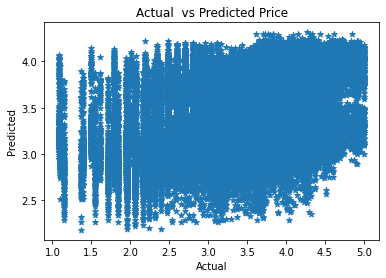

In [41]:
plt.scatter(y_train, y_pred, marker = '*')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual  vs Predicted Price')
plt.show()

After Removing the outliers and doing scaling, Linear Regression didn't give good accuracy.

It didn't fit a best line for the Model.

This might be going underfit for Linear Regression

# Fitting random forest regression

Since random forest have ability to deal with underfit and overfit, This algorithm might give us the good accuracy

In [42]:
## importing the RandomForestRegressor from sklearn

from sklearn.ensemble import RandomForestRegressor

In [43]:
regressor = RandomForestRegressor()
## fitting the x and y train in regressor

regressor.fit(x_train, y_train)
RandomForestRegressor()
## giving the y_pred for x_train

y_pred = regressor.predict(x_train)
## importing the r2_score from sklearn

from sklearn.metrics import r2_score
## giving the Y_predict for x_test

In [44]:
## prdicting the r2 value....

error_score = r2_score(y_train,y_pred)
print('R Squared Error :', error_score)


R Squared Error : 0.9122388984882696


As we know r2 value lies between 0 - 1

our model is giving the r2 value 0.9122....


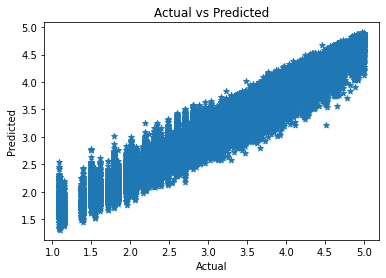

In [45]:
plt.scatter(y_train, y_pred, marker = '*')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

Random forest algorithm giving us the good accuracy for this dataset.

As we have seen that using Linear Regression, model is going underfitting.

Random Forest gave best fit line for the dataset

In [46]:
submission = test[['row_id']]

In [47]:
final_predictions = regressor.predict(test)
submission['engagement_score'] = final_predictions
#only positive predictions for the target variable
submission.to_csv('sample_submission_JPlpRcN.csv', index=False)